<H1>HS608 Final Project - Machine Learning</H1><br>
<b>Author: Jessica Stothers</b><br>
<b>Date: 12/13/19</b>

<b>Data Set:</b> NB: variable age_level has been added to original dataset<br>
Abstract: From National Institute of Diabetes and Digestive and Kidney Diseases; Includes cost data
(donated by Peter Turney)<br><br>
<b>Attribute Information:</b>
 - preg: Number of times pregnant<br>
 - plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
 - pres: Diastolic blood pressure (mm Hg)<br>
 - skin: Triceps skin fold thickness (mm)<br>
 - insu: 2-Hour serum insulin (mu U/ml)<br>
 - mass: Body mass index (weight in kg/(height in m)^2)<br>
 - pedi: Diabetes pedigree function<br>
 - age: Age (years)<br>
 - class: Diabetes class variable (0 or 1)<br>
 - age_level: Age level (years)

<H2>Import Libraries and Load Data</H2>

In [1]:
import numpy as np
import pandas as pd      
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns   
from pandas.api.types import CategoricalDtype # enables specifying categorical agetype below

from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
df = pd.read_csv('diabetes_explore2.csv')

In [51]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null int64
plas         768 non-null int64
pres         768 non-null int64
skin         768 non-null int64
insu         768 non-null int64
mass         768 non-null float64
pedi         768 non-null float64
age          768 non-null int64
class        768 non-null int64
age_level    768 non-null object
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


<H2>Preprocess Data</H2>

<b>Replace impossible values with np.NaN</b><br>

In [3]:
df2 = df.copy(deep=True)

In [4]:
df2['plas'].replace(0, np.nan, inplace=True) 
df2['pres'].replace(0, np.nan, inplace=True)
df2['skin'].replace(0, np.nan, inplace=True)
df2['insu'].replace(0, np.nan, inplace=True)
df2['mass'].replace(0, np.nan, inplace=True)

<b>Change ordinal categorical age_level variable to ordinal integers for machine learning</b>

In [5]:
# change age_level to ordinal integers for machine learning
# alternative is to one-hot encode, but since age_level is ordinal, chose to encode ordinally
df2['age_level'].replace('20s', 0, inplace=True) 
df2['age_level'].replace('30s', 1, inplace=True)
df2['age_level'].replace('40s', 2, inplace=True)
df2['age_level'].replace('50s', 3, inplace=True)
df2['age_level'].replace('60+', 4, inplace=True)

<b>Make all variables floats</b>

In [6]:
# change preg, age, class and age_level to floats so all variables are same data type for machine learning
df2 = df2.astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null float64
plas         763 non-null float64
pres         733 non-null float64
skin         541 non-null float64
insu         394 non-null float64
mass         757 non-null float64
pedi         768 non-null float64
age          768 non-null float64
class        768 non-null float64
age_level    768 non-null float64
dtypes: float64(10)
memory usage: 60.1 KB


<b>Examine data</b>

In [57]:
# Percent of null values in each variable
(df2.isnull().sum() / 768 * 100).round(2) # sum of nulls, divided by number of rows, x 100, rounded

preg          0.00
plas          0.65
pres          4.56
skin         29.56
insu         48.70
mass          1.43
pedi          0.00
age           0.00
class         0.00
age_level     0.00
dtype: float64

In [58]:
# correlation matrix
df2.corr()

,preg,plas,pres,skin,insu,mass,pedi,age,class,age_level
preg,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898,0.524903
plas,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650,0.258513
pres,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589,0.310686
skin,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491,0.141390
insu,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454,0.224240
mass,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680,0.011346
pedi,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844,0.029788
age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356,0.971425
class,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000,0.235942
age_level,0.524903,0.258513,0.310686,0.141390,0.224240,0.011346,0.029788,0.971425,0.235942,1.000000


Since skin and insu have large numbers of missing values and are both highly correlated
with other variables (skin with mass, insu with plas), drop skin and insu from the analysis.

In [7]:
df2_ml = df2.drop(labels=['insu', 'skin'], axis=1)
# df2_ml.head()

In [60]:
# df2_ml.info()

In [8]:
# Percent of null values is now less than 5% in each variable
(df2_ml.isnull().sum() / 768 * 100).round(2) # sum of nulls, divided by number of rows, x 100, rounded

preg         0.00
plas         0.65
pres         4.56
mass         1.43
pedi         0.00
age          0.00
class        0.00
age_level    0.00
dtype: float64

age and age_level are highly correlated (0.97), so drop one

In [9]:
# choose to drop age_level since it contains less information
df2_ml = df2_ml.drop(labels=['age_level'], axis=1)
# df2_ml.head()

<b>Split x attributes and y target, split into train and test sets before impute</b><br>
Test train split first and fit only on training data so that we do not leak data into the training process.

In [10]:
X = df2_ml.drop(labels=['class'], axis=1)
# print (X)
y = df2_ml.loc[:,'class'] 
# print (y)
# print (y.unique())
X_col_names = X.columns.values
X_col_names

array(['preg', 'plas', 'pres', 'mass', 'pedi', 'age'], dtype=object)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
# print(X_train)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

537 537
231 231


<b>Impute X:</b><br>
Fit and transform training set<br>
Transform test set on scale fitted to training set

In [112]:
print ("Mean:\n",X_train.apply(np.nanmedian, axis = 0), "\n") #calculate medians to compare with means
print("Median:\n",X_train.apply(np.nanmean, axis = 0)) # shows means

Mean:
 preg      3.000
plas    118.000
pres     72.000
mass     32.200
pedi      0.378
age      30.000
dtype: float64 

Median:
 preg      3.836127
plas    122.108614
pres     71.836893
mass     32.388136
pedi      0.481223
age      33.266294
dtype: float64


Choose to impute with median instead of mean since the distributions of many variables are skewed.

In [12]:
imp_x = Imputer(missing_values='NaN', strategy='median', axis=0) 
X_train = imp_x.fit_transform(X_train) # fit AND transform training set
X_test = imp_x.transform(X_test) # transform test set on scale fitted to training set
# X_train

<H2>Predict Diabetes Class</H2>

<H3>RBF kernel models</H3>

<b>scv0 - Basic RBF model</b>

In [13]:
svc0 = SVC(kernel='rbf', cache_size=1000, probability=True) 
# print (svc0)
clf = svc0.fit(X_train,y_train) # trains the classifier on the training set
y_pred0 = svc0.predict(X_test) # tests the classifier on the test set
pTot0 = accuracy_score(y_test, y_pred0)
print ("Prediction accuracy: ", pTot0)
print (confusion_matrix(y_test, y_pred0))

Prediction accuracy:  0.6493506493506493
[[150   0]
 [ 81   0]]


In [14]:
print(classification_report(y_test, y_pred0))

             precision    recall  f1-score   support

        0.0       0.65      1.00      0.79       150
        1.0       0.00      0.00      0.00        81

avg / total       0.42      0.65      0.51       231



/Users/Jessica/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model is clearly wrong since it predicts everything as class 0 (no diabetes). Using an RBF kernel, we get a prediction accuracy of 0.65, with a precision of 0.42 and a recall of 0.65. This first model is innaccurate (Prediction accuracy:  0.65). It has higher recall (0.65) than precision (0.42), indicating the model has a low false negative rate, but that its false positive rate is not as low.  

In [16]:
probas_ = svc0.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of diabetes, not of no-diabetes
roc_auc0 = auc(fpr, tpr)
# print ("thresholds", thresholds)
# print ("probas_", probas_)
print ("AUC using predict_proba", roc_auc0)

AUC using predict_proba 0.6724691358024691


The AUC (0.67) is low indicating that the model has a low amount of predictive value. There is a 67% chance that model will be able to distinguish between class no diabetes and class diabetes.

In [17]:
%matplotlib inline

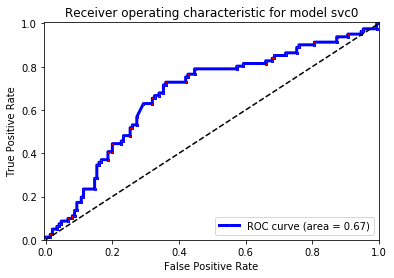

In [18]:
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc0, lw=3, color ="blue", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for model svc0')
plt.legend(loc="lower right")
plt.show()

<b>Min-Max Scaling</b><br>
Next, we min-max scale the data before performing svc

In [19]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train) # fit AND transform training set
X_test_minmax = min_max_scaler.transform(X_test) # test set transform only, no fit
# X_test_minmax 

<b>scv1 - Basic RBF model with min-max data</b>

In [20]:
svc1 = SVC(kernel='rbf', cache_size=1000, probability=True) 
# print (svc1) # calls SVC __str__ to view all the attibutes, including the default params you used 
clf = svc1.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax1 = svc1.predict(X_test_minmax) # tests the classifier on the test set
pTot1 = accuracy_score(y_test, y_pred_minmax1)
print ("Prediction accuracy: ",pTot1)

Prediction accuracy:  0.7575757575757576


In [21]:
print(confusion_matrix(y_test, y_pred_minmax1))
print(classification_report(y_test, y_pred_minmax1))

[[135  15]
 [ 41  40]]
             precision    recall  f1-score   support

        0.0       0.77      0.90      0.83       150
        1.0       0.73      0.49      0.59        81

avg / total       0.75      0.76      0.74       231



When we min-max scale the data before performing svc, the prediction accuracy gets better (0.75), as does the precision (0.75) and recall (0.76). The high precision indicates a low false positive rate, and the high recall indicates a low false negative rate. While precision is similar for class 0 (no diabetes) and 1 (diabetes), recall is much better for class 0 (0.90) than for class 1 (0.49), indicating that the model generates a lot of false negatives when predicting for diabetes.

In [22]:
probas_ = svc1.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of diabetes, not of no-diabetes
roc_auc1 = auc(fpr, tpr)
# print ("thresholds", thresholds)
# print ("probas_", probas_)
print ("AUC using predict_proba", roc_auc1)

AUC using predict_proba 0.81440329218107


The AUC (0.81) is much higher than the previous modle (0.67) indicating that the model's predictive value has increased. There is an 81% chance that model will be able to distinguish between class no diabetes and class diabetes.

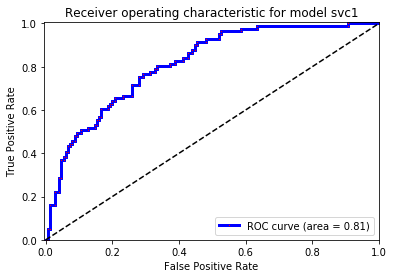

In [23]:
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc1, lw=3, color ="blue", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for model svc1')
plt.legend(loc="lower right")
plt.show()

<b>scv2 - RBF model with min-max data and balanced class weight</b>

In [24]:
svc2 = SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True)
# print (svc2) # calls SVC __str__ to view all the attibutes, including the default params you used 
clf = svc2.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax2 = svc2.predict(X_test_minmax) # tests the classifier on the test set
pTot2 = accuracy_score(y_test, y_pred_minmax2)
print ("Prediction accuracy: ",pTot2)

Prediction accuracy:  0.7186147186147186


In [25]:
print(confusion_matrix(y_test, y_pred_minmax2))
print(classification_report(y_test, y_pred_minmax2))

[[114  36]
 [ 29  52]]
             precision    recall  f1-score   support

        0.0       0.80      0.76      0.78       150
        1.0       0.59      0.64      0.62        81

avg / total       0.72      0.72      0.72       231



In [26]:
probas_ = svc2.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of diabetes, not of no-diabetes
roc_auc2 = auc(fpr, tpr)
# print ("thresholds", thresholds)
# print ("probas_", probas_)
print ("AUC using predict_proba", roc_auc2)

AUC using predict_proba 0.8099588477366255


When we balance the class weights the prediction accuracy decreases (0.72), as does the precision (0.72) and recall (0.72). The AUC also decreases slightly (0.81) indicated that the model's predictive value has decreased. Interestingly, the precision has decreased and recall has increased for class 1, indicating that this model generates more false positives and less false negatives for diabetes. 

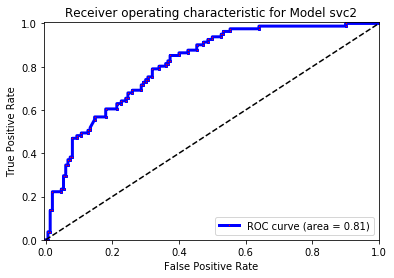

In [27]:
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc2, lw=3, color ="blue", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Model svc2')
plt.legend(loc="lower right")
plt.show()

Now that we know the our best rbf model came from non-balanced class-weight, we tune the parameters for c and gamma. 

<H3>Parameter tuning - C and gamma</H3>

In [28]:
C_range = 10.0 ** np.arange(-2, 4)
#gamma_range = 10.0 ** np.arange(-3, 3)
gamma_range = [.01, .1, 1, 'auto', 10, 100]
print (gamma_range)
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

[0.01, 0.1, 1, 'auto', 10, 100]


{'gamma': [0.01, 0.1, 1, 'auto', 10, 100],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [29]:
# Default is 3-fold cross validation
grid = GridSearchCV(SVC(kernel='rbf',cache_size=1000, probability=True), param_grid=param_grid) 
grid.fit(X_train_minmax, y_train)# run the grid search on the training data only
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print ("The best C and gamma for rbf is: %.5f, %.5f " % (best_C, best_gamma))
grid.best_estimator_

The best C and gamma for rbf is: 100.00000, 0.10000 


SVC(C=100.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
pTot_best = accuracy_score(y_test, best_predict_minmax)
print("Prediction accuracy: ",pTot_best)
print(confusion_matrix(y_test, best_predict_minmax))
print(classification_report(y_test, best_predict_minmax))

Prediction accuracy:  0.7489177489177489
[[133  17]
 [ 41  40]]
             precision    recall  f1-score   support

        0.0       0.76      0.89      0.82       150
        1.0       0.70      0.49      0.58        81

avg / total       0.74      0.75      0.74       231



The prediction accuracy (0.75) increases when we perform a 3-fold cross validation to choose the best C and gamma.

<b>scv3 - RBF model with min-max data and best C and gamma</b>

In [31]:
svc3 = SVC(C=100, gamma=0.1, kernel='rbf', cache_size=1000, probability=True) 
clf = svc3.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax3 = svc3.predict(X_test_minmax) # tests the classifier on the test set
pTot3 = accuracy_score(y_test, y_pred_minmax3)
print ("Prediction accuracy: ",pTot3)

Prediction accuracy:  0.7489177489177489


In [32]:
print(confusion_matrix(y_test, y_pred_minmax3))
print(classification_report(y_test, y_pred_minmax3))

[[133  17]
 [ 41  40]]
             precision    recall  f1-score   support

        0.0       0.76      0.89      0.82       150
        1.0       0.70      0.49      0.58        81

avg / total       0.74      0.75      0.74       231



In [41]:
probas_ = svc3.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of (diabetes), not of no diabetes
roc_auc3 = auc(fpr, tpr)
print ("AUC using predict_proba", roc_auc3)
# probas_

AUC using predict_proba 0.822798353909465


When we use the best C and gamma, the prediction accuracy increases (0.75), as does the precision (0.74) and recall (0.75). The AUC also increases slightly (0.82) indicating that the model's predictive value has increased. There is an 82% chance that model will be able to distinguish between class no diabetes and class diabetes.<br><br>
This model is the best rbf kernel model tested here as it has the most predictive value (AUC 0.82) and high prediction accuracy (0.75).

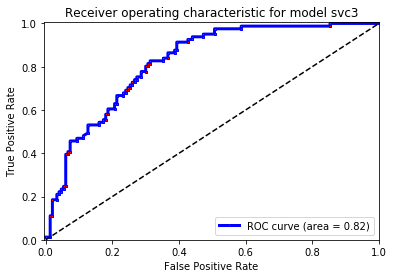

In [42]:
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc3, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for model svc3')
plt.legend(loc="lower right")
plt.show()

<H3>poly kernel models</H3>

<b>scv4 - Poly model with min-max data</b>

In [43]:
svc4 = SVC(kernel='poly', cache_size=1000, probability=True) 
print (svc4) # calls SVC __str__ to view all the attibutes, including the default params you used 
clf = svc4.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax4 = svc4.predict(X_test_minmax) # tests the classifier on the test set
pTot4 = accuracy_score(y_test, y_pred_minmax4)
print ("Prediction accuracy: ",pTot4) # Prediction accuracy:  0.658008658008658

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.658008658008658


In [44]:
print(confusion_matrix(y_test, y_pred_minmax4))
print(classification_report(y_test, y_pred_minmax4))

[[150   0]
 [ 79   2]]
             precision    recall  f1-score   support

        0.0       0.66      1.00      0.79       150
        1.0       1.00      0.02      0.05        81

avg / total       0.78      0.66      0.53       231



In [59]:
probas_ = svc4.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of (diabetes), not of no diabetes
roc_auc4 = auc(fpr, tpr)
print ("AUC using predict_proba", roc_auc4)
# probas_

AUC using predict_proba 0.7967078189300412


When we use a poly kernel, the prediction accuracy decreases (0.66). The precision increases (0.78) while recall decreases (0.66). This indicates that the poly model is generating less false positives, but more false negatives. This model seems to be classifying too many observations as 0 (no diabetes). The AUC also decreases (0.80) indicating that the model's predictive value has decreased. There is an 80% chance that model will be able to distinguish between class no diabetes and class diabetes.

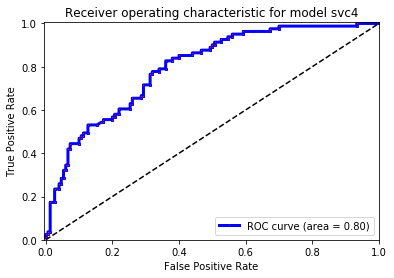

In [60]:
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc4, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for model svc4')
plt.legend(loc="lower right")
plt.show()

<b>scv5 - Poly model with min-max data and balanced class weight</b>

In [48]:
svc5 = SVC(kernel='poly', class_weight='balanced', cache_size=1000, probability=True) 
# print (svc5) # calls SVC __str__ to view all the attibutes, including the default params you used 
clf = svc5.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax5 = svc5.predict(X_test_minmax) # tests the classifier on the test set
pTot5 = accuracy_score(y_test, y_pred_minmax5)
print ("Prediction accuracy: ",pTot5) # Prediction accuracy:  0.7316017316017316

Prediction accuracy:  0.7316017316017316


In [49]:
print(confusion_matrix(y_test, y_pred_minmax5))
print(classification_report(y_test, y_pred_minmax5))

[[141   9]
 [ 53  28]]
             precision    recall  f1-score   support

        0.0       0.73      0.94      0.82       150
        1.0       0.76      0.35      0.47        81

avg / total       0.74      0.73      0.70       231



In [61]:
probas_ = svc5.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of (diabetes), not of no diabetes
roc_auc5 = auc(fpr, tpr)
print ("AUC using predict_proba", roc_auc5)
# probas_

AUC using predict_proba 0.7817283950617283


When we use a poly kernel with balanced class weights the prediction accuracy increases (0.73). The precision decreases (0.74), but the recall increases (0.73). This model is generating more false positives than the unbalanced poly model, but less false negatives. The AUC decreases to 0.78, but overall this model is better since the previous model almost did not predict any observations to have diabetes, while this model makes more balanced predictions.

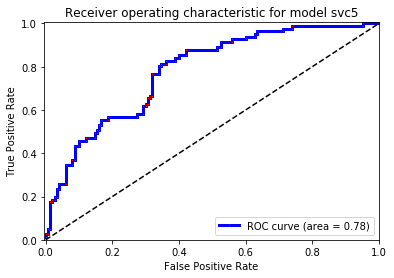

In [62]:
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc5, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for model svc5')
plt.legend(loc="lower right")
plt.show()

<H3>Parameter tuning - C and degree</H3>

In [65]:
C_range = 10.0 ** np.arange(-2, 4)
degree_range = [1, 2, 3, 4, 5, 6]
print (degree_range)
param_grid = dict(degree=degree_range, C=C_range)
param_grid

[1, 2, 3, 4, 5, 6]


{'degree': [1, 2, 3, 4, 5, 6],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [66]:
# Default is 3-fold cross validation
grid = GridSearchCV(SVC(kernel='poly', class_weight='balanced', cache_size=1000, probability=False), param_grid=param_grid) 
grid.fit(X_train_minmax, y_train)# run the grid search on the training data only
best_C = grid.best_estimator_.C
best_degree = grid.best_estimator_.degree
print ("The best C and degree for poly is: %.5f, %.5f " % (best_C, best_degree))
grid.best_estimator_

The best C and degree for poly is: 100.00000, 3.00000 


SVC(C=100.0, cache_size=1000, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
pTot_best = accuracy_score(y_test, best_predict_minmax)
print("Prediction accuracy: ",pTot_best)
print(confusion_matrix(y_test, best_predict_minmax))
print(classification_report(y_test, best_predict_minmax))

Prediction accuracy:  0.7402597402597403
[[124  26]
 [ 34  47]]
             precision    recall  f1-score   support

        0.0       0.78      0.83      0.81       150
        1.0       0.64      0.58      0.61        81

avg / total       0.74      0.74      0.74       231



<b>scv6 - Poly model with min-max data and best C and degree</b>

In [68]:
svc6 = SVC(C=100, degree=3, kernel='poly', class_weight='balanced', cache_size=1000, probability=True) 
clf = svc6.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax6 = svc6.predict(X_test_minmax) # tests the classifier on the test set
pTot6 = accuracy_score(y_test, y_pred_minmax6)
print ("Prediction accuracy: ",pTot6)

Prediction accuracy:  0.7402597402597403


In [69]:
print(confusion_matrix(y_test, y_pred_minmax6))
print(classification_report(y_test, y_pred_minmax6))

[[124  26]
 [ 34  47]]
             precision    recall  f1-score   support

        0.0       0.78      0.83      0.81       150
        1.0       0.64      0.58      0.61        81

avg / total       0.74      0.74      0.74       231



In [70]:
probas_ = svc6.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of (diabetes), not of no diabetes
roc_auc6 = auc(fpr, tpr)
print ("AUC using predict_proba", roc_auc6)
# probas_

AUC using predict_proba 0.8241152263374486


When we use a poly kernel with balanced class weights and the best C and degree, the prediction accuracy increases (0.74). The precision stays the same (0.74), and the recall increases (0.74). This model is generating less false negatives than the poly model without tuned parameters. The recall is also more balanced between the diabetes classes, with a recall of 0.83 for class 0 (no diabetes) and 0.58 for class 1 (diabetes) (vs recall 0: 0.94, 1: 0.35 in svc5). The AUC increases to 0.82, indicating that this model's predictive value has increased overall.<br><br>This model is the best poly kernel model tested here as it has the most predictive value (AUC 0.82), high prediction accuracy (0.74) and a balanced recall between diabetes classes.

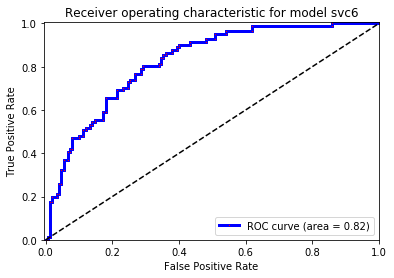

In [71]:
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc6, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for model svc6')
plt.legend(loc="lower right")
plt.show()

<H2>Save the Best Model</H2>

From these calculations, the best model is the rbf kernel model svc3 with a prediction accuracy of 0.75 and an AUC of 0.82. While svc3's AUC is the same as svc6's (0.82), svc3 has a higher prediction accuracy compared to svc6 (0.74).<br>``` python svc3 = SVC(C=100, gamma=0.1, kernel='rbf', cache_size=1000, probability=True)```

In [58]:
import pickle
# pickle and save the trained model
outfile= open('model_best.pkl','wb')
pickle.dump(svc3, outfile)
outfile.close()